In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercício 6

Use o código abaixo para carregar o dataset tips com o Seaborn (que apresenta dados acerca da gorjeta paga por clientes, e ovalor total da conta , bem como outras informações);

Apresente as estatísticas descritivas do dataset com a função describe();

Mostre as colunas do dataset;

Mostre o shape do dataset;

Verifique os valores únicos das colunas sex, smoker, day e time;

Apresente a proporção entre homens e mulheres;

Apresente a proporção entre fumantes e não fumantes;

In [2]:
tips = sns.load_dataset('tips')

In [6]:
# estatísticas descritivas do dataset

tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# primeiras 5 linhas do dataset

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# infos do dataset

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
# colunas do dataset

tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
# shape do dataset

tips.shape

(244, 7)

In [11]:
# valores únicos

print(tips['sex'].unique())
print(tips['smoker'].unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']


In [12]:
print(tips['day'].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


In [13]:
print(tips['time'].unique())

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [14]:
# proporção entre homens e mulheres

tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [16]:
# proporção entre fumantes e não fumantes

tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

# Exercício 7

Use a função sns.countplot() para construir um gráfico com os dados categóricos do dataset.

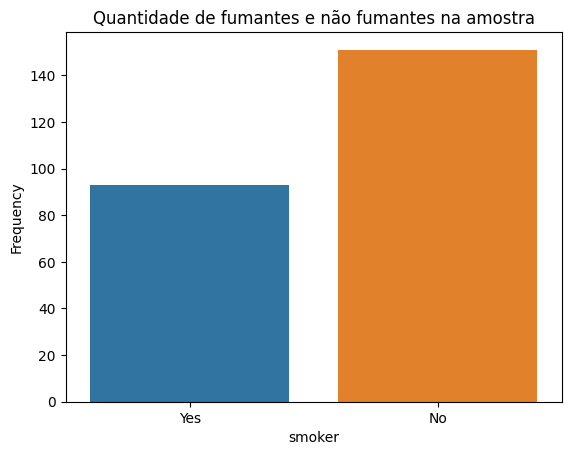

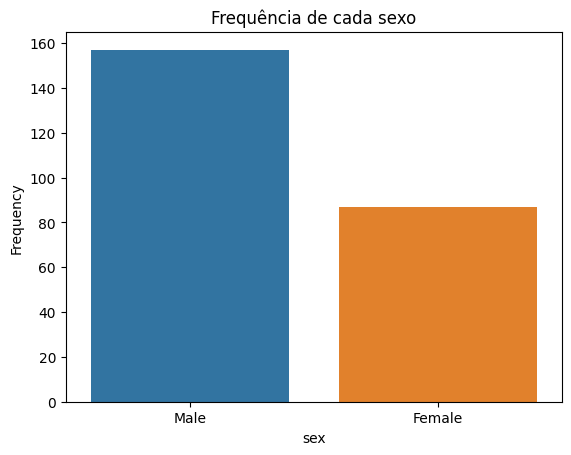

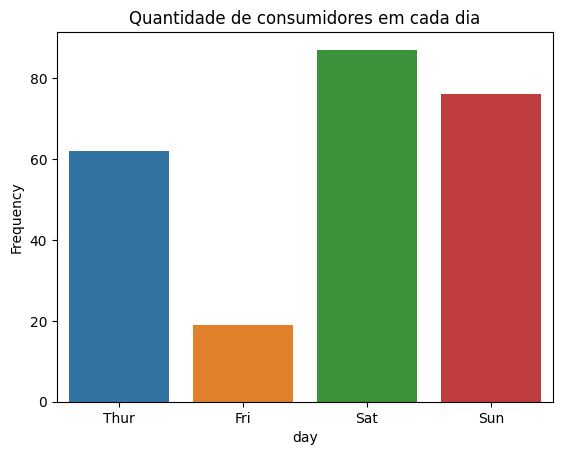

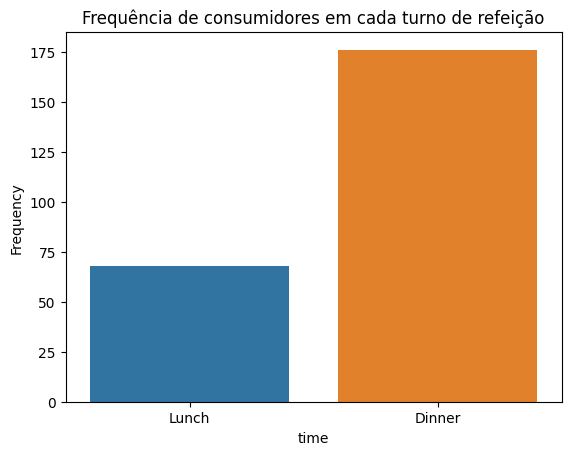

In [20]:
categoricos = ['smoker', 'sex', 'day', 'time']

for columns in categoricos:
  if columns == 'smoker':
    sns.countplot(
        x = 'smoker',
        data = tips
    )
    plt.title('Quantidade de fumantes e não fumantes na amostra')
    plt.ylabel('Frequency')
    plt.show()
  elif columns == 'sex':
    sns.countplot(
        x = 'sex',
        data = tips
    )
    plt.title('Frequência de cada sexo')
    plt.ylabel('Frequency')
    plt.show()
  elif columns == 'day':
    sns.countplot(
        x = 'day',
        data = tips
    )
    plt.title('Quantidade de consumidores em cada dia')
    plt.ylabel('Frequency')
    plt.show()
  else:
    sns.countplot(
        x = 'time',
        data = tips
    )
    plt.title('Frequência de consumidores em cada turno de refeição')
    plt.ylabel('Frequency')
    plt.show()
  print()

In [25]:
# outra forma de fazer

df_categorico = tips.select_dtypes(include = 'category') # 'criando' um novo dataframe somente com as colunas que apresentam dados categóricos
df_categorico

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


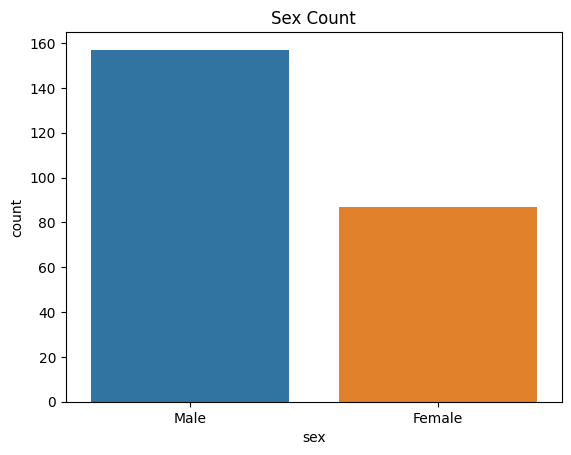

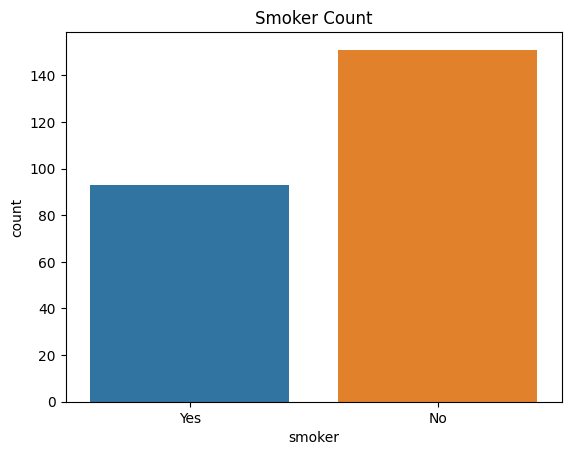

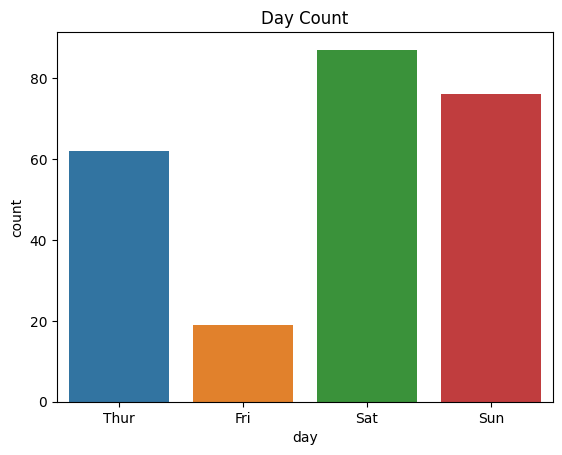

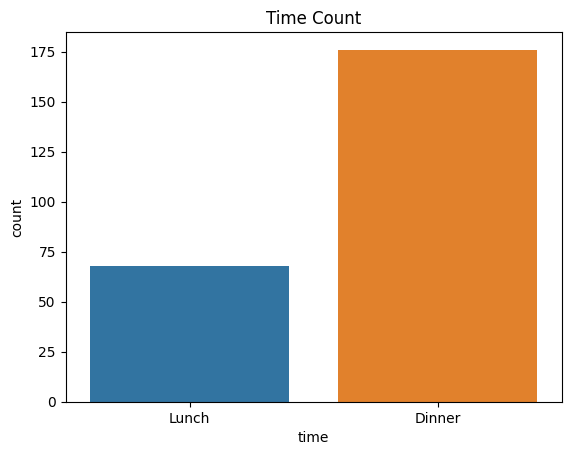

In [27]:
for variable in df_categorico:
  sns.countplot(
      x = variable,
      data = df_categorico
  )
  plt.title(variable.title()+' Count')
  plt.show()
  print()

# Exercício 8

Use a função sns.scatterplot() para visualizar a relação entre as variáveis 'total_bill' e 'tip';

Utilize a função sns.scatterplot() para visualizar a relação entre as variáveis 'total_bill' e 'tip' e use o argumento hue para colorir cada ponto com a variável 'sex'.

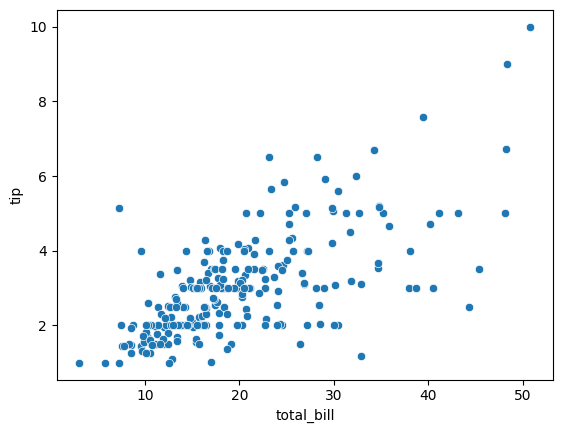

In [29]:
sns.scatterplot(
    x = 'total_bill',
    y = 'tip',
    data = tips
)
plt.show()

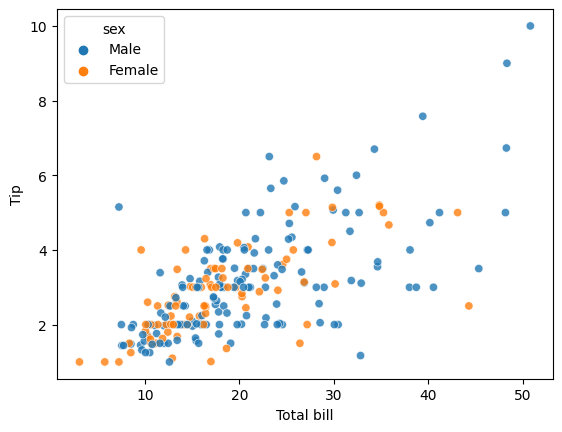

In [31]:
sns.scatterplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    hue = 'sex',
    alpha = 0.8
)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

# Exercício 9

Utilize a função sns.relplot() para visualizar a relação entre as variáveis 'tip' e 'size' e use ainda o argumento hue para colorir cada ponto com a variável 'smoker'.

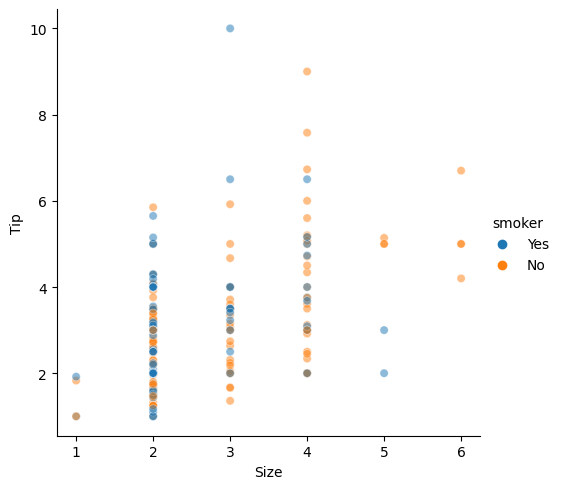

In [33]:
sns.relplot(
    x = 'size',
    y = 'tip',
    data = tips,
    hue = 'smoker',
    alpha = 0.5
)
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()

# Exercício 10

Construa um boxplot para as variáveis quantitativas do dataset.

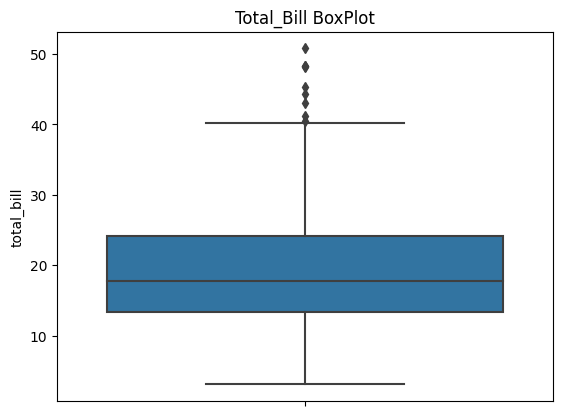

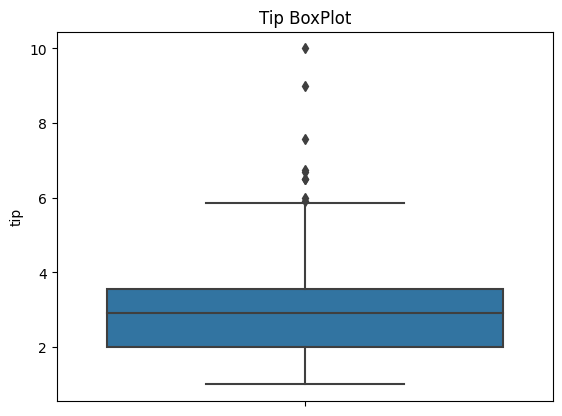

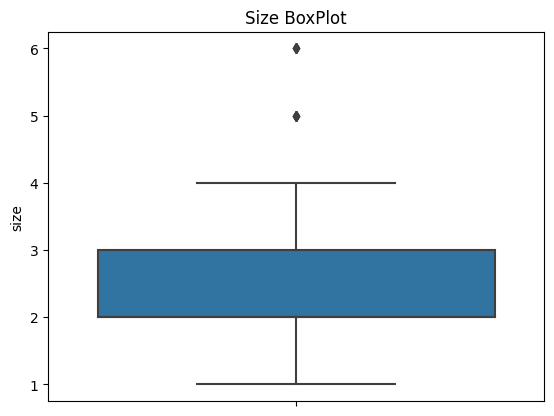

In [35]:
for variable in tips.select_dtypes(exclude = 'category'):
  sns.boxplot(y = variable, data = tips)
  plt.title(variable.title()+' BoxPlot')
  plt.show()
  print()

# Exercício 11

Use a função sns.histplot() para visualizar a distribuição das variáveis 'tip' e 'total_bill'.

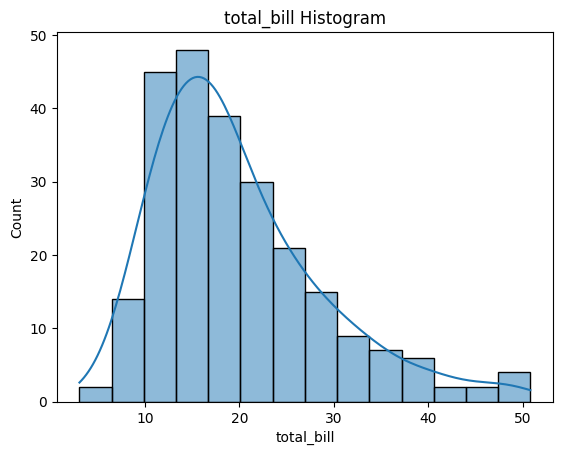

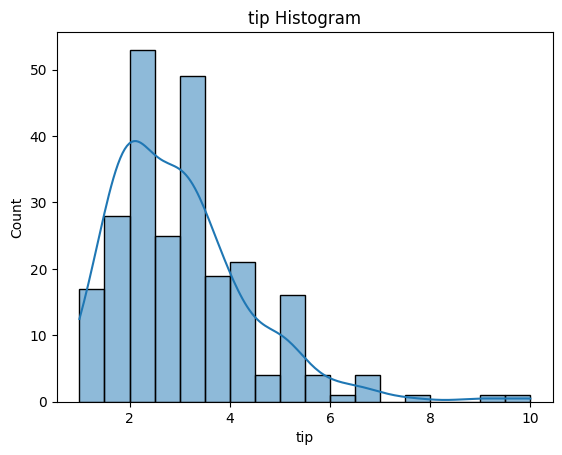

In [41]:
for columns in tips.columns:
  if columns == 'tip' or columns == 'total_bill':
    sns.histplot(data = tips[columns], kde = True)
    plt.title(columns+' Histogram')
    plt.show()
    print()

# Exercício 12

Construa um heatmap para o visualizar o grau de relação entre as variáveis.

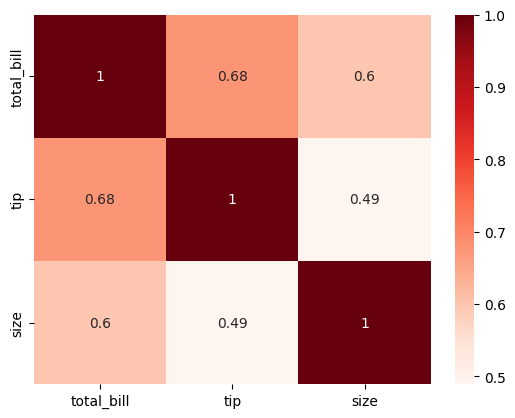

In [49]:
new_tips = tips.select_dtypes(exclude = 'category')
corr = new_tips.corr()

#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    data = corr,
    cmap = 'Reds',
    #mask = mask,
    annot = True
)
plt.show()

# Exercício 13

Faça um pairplot para analisar a relação entre as variáveis do dataset.

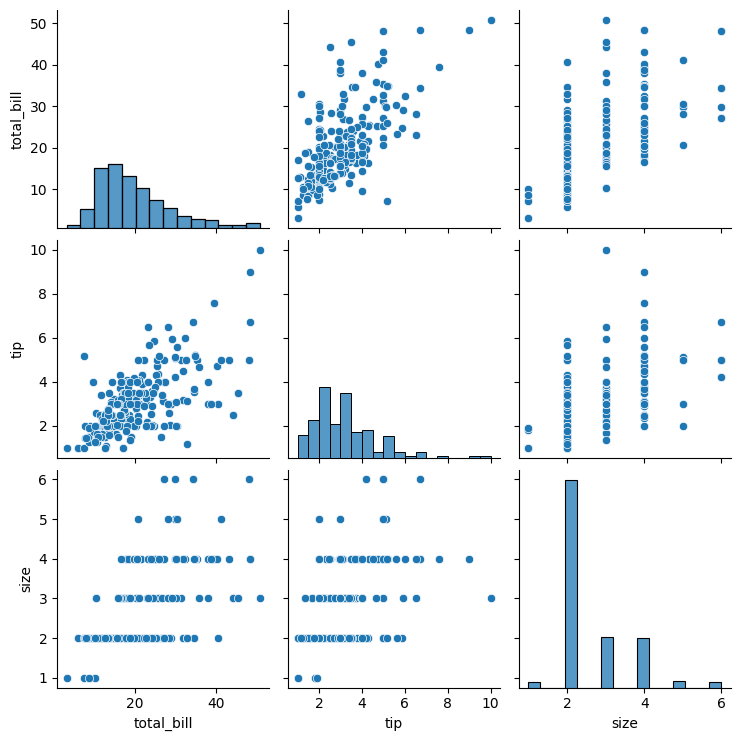

In [53]:
sns.pairplot(tips);

# Exercício 15

Use a função sns.lmplot() para visualizar a relação entre 'total_bill' e 'tip', ajustando um reta de regressão linear e use ainda o argumento hue para colorir cada ponto com a variável 'smoker'.

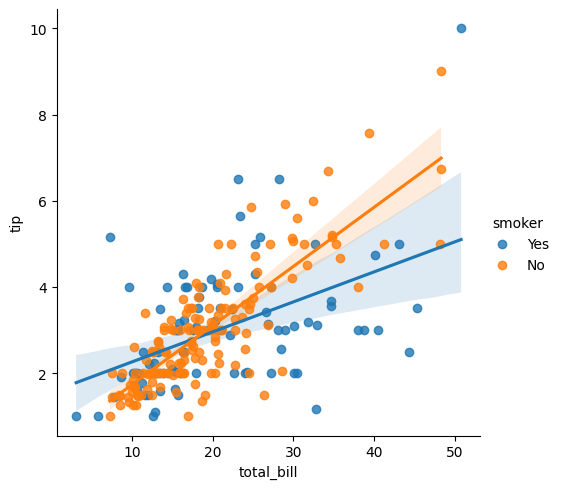

In [55]:
sns.lmplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    hue = 'smoker',
)
plt.show()